In [131]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.interpolate import interp1d
import pandas as pd
from scipy.optimize import curve_fit
import os
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in", "ytick.direction": "in"})

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')

metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [150]:
ultau=np.append(0.001,10**(np.array(tau[1:])-9))

In [140]:
def SFH(AGE,TAU):
    return AGE*np.exp(-AGE/TAU)

def LWA(dist,tau):
    top = []
    bottom = []
    for i in range(len(age)):
        top.append(np.trapz(SFH(age,tau)[0:i+1] * dist[0:i+1] * (age[i] - age[0:i+1]), age[0:i+1]))
        bottom.append(np.trapz(SFH(age,tau)[0:i+1] * dist[0:i+1], age[0:i+1]))
    return np.array(top)/np.array(bottom)

def b_dist(dist,tau):
    bottom = []
    for i in range(len(age)):
        bottom.append(np.trapz(SFH(age,tau)[0:i+1]*dist[0:i+1],age[0:i+1]))
    return np.array(bottom)

def B_weight(dist,t_star):
    t_prime = np.append(np.arange(t_star-.001,.501,-.1),.501)
    idist = interp1d(age,dist)
    return idist(t_prime)

def Bottom_dist(Z,t_star,log_tau):
    return B_weight(g_grid[np.argwhere(metal == Z)[0][0]].T[np.argwhere(np.array(tau) == log_tau)[0][0]],t_star)\
           *SFH(np.arange(0.5,t_star+0.1,.1),10**(log_tau -9))

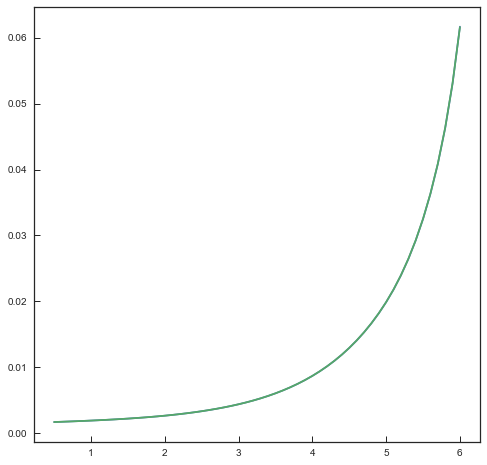

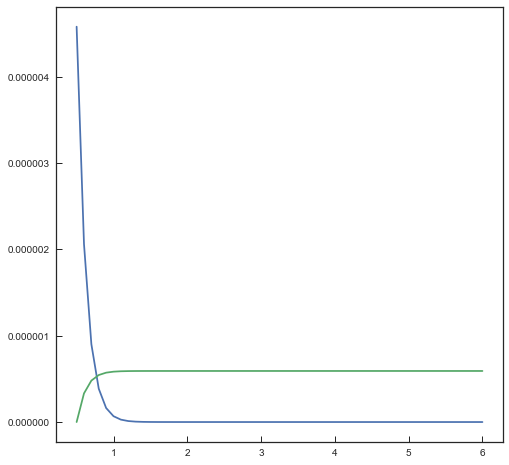

In [143]:
plt.figure(figsize=[8,8])
plt.plot(age,g_dist[5][::-1])
plt.plot(age,B_weight(g_dist[5],6))

plt.figure(figsize=[8,8])
plt.plot(age,Bottom_dist(metal[17], 6, 8.0))
plt.plot(age,b_dist(g_dist[0][::-1],0.1))

In [97]:
g_grid = np.zeros([metal.size,age.size,len(tau)])
for i in range(metal.size):
    g_grid[i]=np.load('../data/m%s_gbf.npy' % metal[i]).T
    
age_conv = np.load('../data/light_weight_scaling.npy')

In [148]:
g_grid.shape

(31, 56, 29)

In [156]:
lwa_grid = np.zeros([metal.size,age.size,len(tau)])
for i in range(metal.size):
    for ii in range(len(tau)):
        lwa_grid[i].T[ii] = LWA(g_grid[i].T[ii][::-1],ultau[ii])

/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in divide


In [158]:
age_conv[17]

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.1       ,  0.06356273,  0.05249876, ...,  0.04333871,
         0.04332237,  0.04329165],
       [ 0.2       ,  0.12842758,  0.10590647, ...,  0.08774925,
         0.08771677,  0.08765576],
       ..., 
       [ 5.3       ,  5.19330948,  5.03772041, ...,  1.78293487,
         1.77164238,  1.75090194],
       [ 5.4       ,  5.29322246,  5.13777042, ...,  1.81899402,
         1.8072704 ,  1.78574486],
       [ 5.5       ,  5.39311973,  5.23774645, ...,  1.85528635,
         1.84312243,  1.82079536]])

In [159]:
lwa_grid[17]

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [ 0.1       ,  0.06895733,  0.05745682, ...,  0.04573781,
         0.04572389,  0.04569849],
       [ 0.2       ,  0.13829335,  0.1155057 , ...,  0.09222486,
         0.09219716,  0.09214666],
       ..., 
       [ 5.3       ,  5.19311868,  5.0377462 , ...,  1.83874407,
         1.82749834,  1.80686189],
       [ 5.4       ,  5.29311868,  5.1377462 , ...,  1.84955129,
         1.83785283,  1.81638269],
       [ 5.5       ,  5.39311868,  5.2377462 , ...,  1.85553957,
         1.84337546,  1.82104815]])

In [98]:
g_dist= g_grid[17].T[1:7]
lwage = age_conv[17].T[1:7]

0.00123548461578 0.980784006991 1.0
0.00129348186967 0.96482563515 1.0


0.00134016974399 0.946056257854 1.0
0.00137266806285 0.919243079343 1.0


0.00137179175409 0.865662302433 1.0
0.00133138307517 0.774767692079 1.0


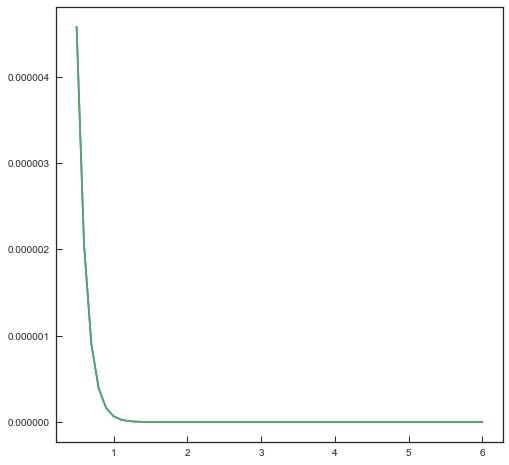

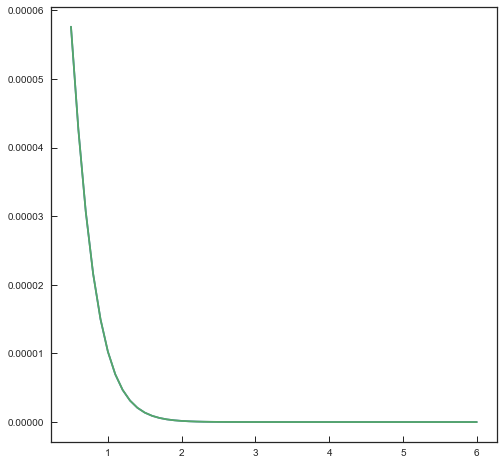

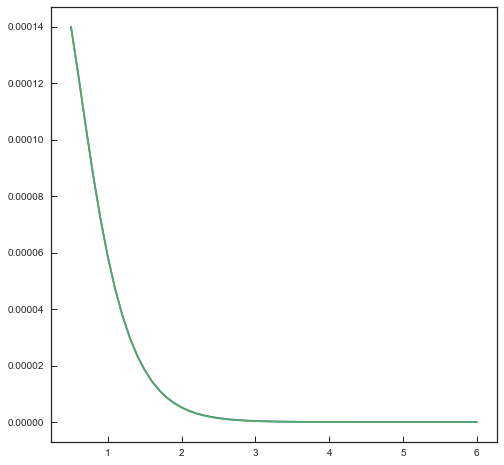

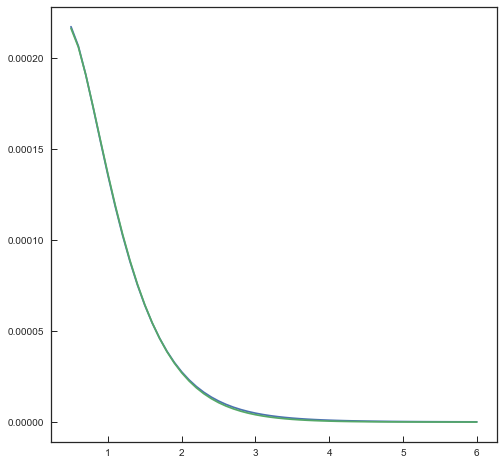

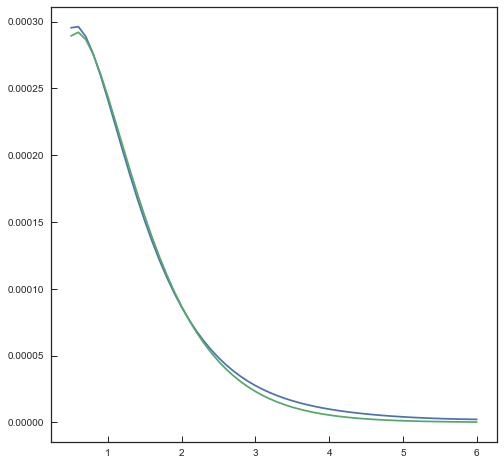

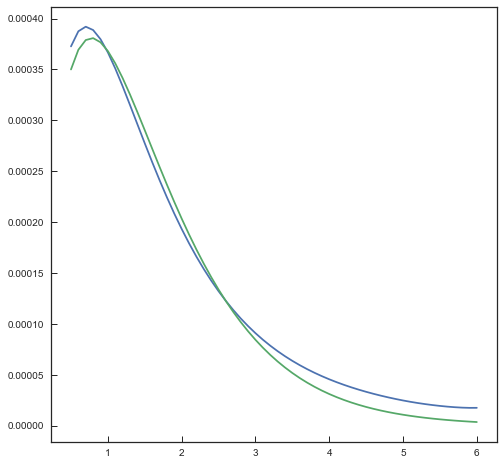

In [96]:
%matplotlib inline

# lgdist = np.log(SFH(age,ultau[i+1])*g_dist[i][::-1])

# plt.figure(figsize=[8,8])
for i in range(len(g_dist)):
    def fit_func(x, a, b, c):
        return a*x*np.exp(-b*(x)/ultau[i+1])

    params = curve_fit(fit_func, age,SFH(age,ultau[i+1])*g_dist[i][::-1])
    [a, b, c] = params[0]
    print a,b,c
    
    plt.figure(figsize=[8,8])

    plt.plot(age,SFH(age,ultau[i+1])*g_dist[i][::-1])
    plt.plot(age,a*age*np.exp(-b*(age)/ultau[i+1]))

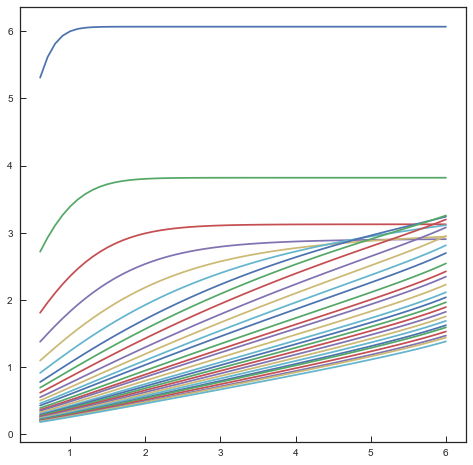

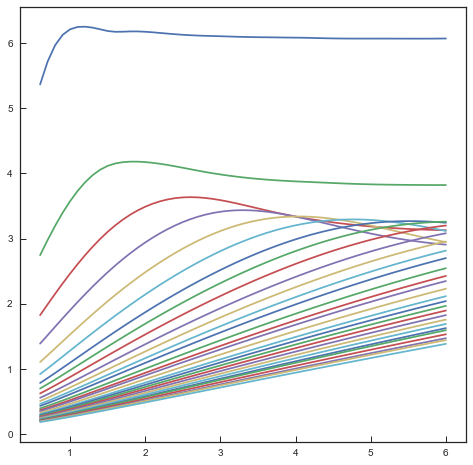

In [168]:
plt.figure(figsize=[8,8])


for i in range(len(tau)-1):
    # 
    # def fit_func(x, a, b):
    #     return a*x*np.exp(-b*(x)/ultau[i+1])
    # 
    # params = curve_fit(fit_func, age,SFH(age,ultau[i+1])*g_dist[i][::-1])
    # [a, b] = params[0]
    # print a,b
        
    # plt.figure(figsize=[8,8])
    # plt.plot(age, age_conv[17].T[i])
    # plt.plot(age, lwa_grid[17].T[i])
    plt.plot(age, (age - lwa_grid[17].T[i+1])/ultau[i+1])
    
plt.figure(figsize=[8,8])


for i in range(len(tau)-1):

    plt.plot(age, (age - age_conv[17].T[i+1])/ultau[i+1])
    
np.save('../data/light_weight_scaling_2.npy', lwa_grid)

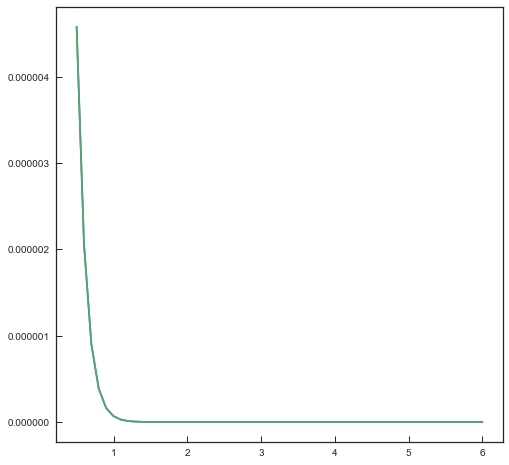

In [77]:
plt.figure(figsize=[8,8])
plt.plot(age,SFH(age,0.1)*g_dist[0][::-1])
plt.plot(age, a*age*np.exp(-b*age/0.1))
# plt.ylim(0,0.03)

In [80]:
param = np.polyfit(age,np.log(g_dist[0]),2)
fit = np.polyval(param,age)

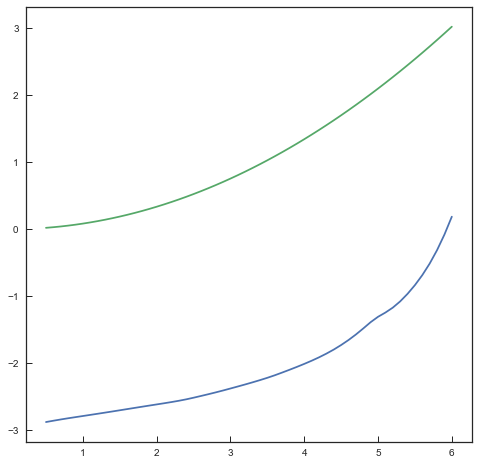

In [222]:
plt.figure(figsize=[8,8])
plt.plot(age,np.log(gdist/C))
plt.plot(age,.084*(age)**2)


# plt.figure(figsize=[8,8])
# # plt.plot(age,np.log(g_dist[0]))
# # plt.plot(age,fit)
# plt.plot(age,age**2/.01)

# ci=np.trapz(x=age,y=np.exp(-0.45*age**3))

# plt.figure(figsize=[8,8])
# plt.plot(age,g_dist[0]/C)
# plt.plot(age,np.exp(-.45*age**3)/ci)

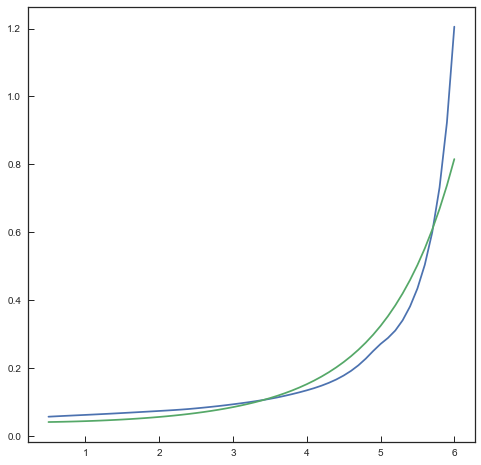

In [224]:
ci=np.trapz(x=age,y=np.exp(0.084*age**2))

plt.figure(figsize=[8,8])
plt.plot(age,gdist/C)
plt.plot(age,np.exp(0.084*age**2)/ci)

In [220]:
C=np.trapz(x=age,y=gdist)

c_gdist = np.zeros(len(gdist))
for i in range(len(gdist)):
    if i == 0:
        c_gdist[i] = gdist[i]/C
    else:
        c_gdist[i] = c_gdist[i-1] + gdist[i]/C

ks = []
rng = np.arange(.05,0.1,.001)
for i in rng:
    test = np.exp(i*age**2)
    ci=np.trapz(x=age,y=test)
    test /= ci
    c_test = np.zeros(len(test))
    for ii in range(len(test)):
        if ii == 0:
            c_test[ii] = test[ii]
        else:
            c_test[ii] = c_test[ii-1] + test[ii]
    ks.append(max(np.abs(c_gdist-c_test)))

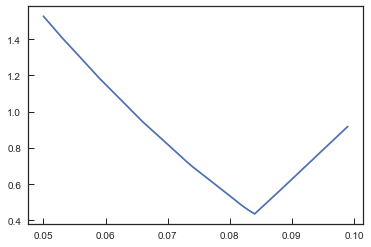

In [221]:
plt.plot(rng,ks)